# SVM Model Training Evaluation

A Support Vector Machine (SVM) is a powerful and versatile machine learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection. It is particularly well-suited for classification of complex but small-sized or medium-sized datasets.

Some reasons why we might choose an SVM would be:

- ***Effective in high dimensional spaces:*** SVMs are especially powerful when dealing with high-dimensional data, i.e., data with a large number of features. They can handle datasets with more features than samples efficiently, which many other algorithms struggle with.

- ***Versatility:*** SVMs can solve both linear and non-linear problems thanks to the kernel trick. Depending on the data, different kernel functions (linear, polynomial, radial basis function (RBF), sigmoid, etc.) can be used to create the best decision boundary.

- ***Robustness:*** SVMs aim to find the optimal hyperplane that maximally separates data points of different classes by maximizing the margin around the hyperplane. This makes them robust to individual variations in data points.

- ***Overfitting control:*** SVMs offer good generalization performance, meaning they tend to perform well on unseen data. This is in part due to their ability to control overfitting through the use of hyperparameters, including the choice of kernel and the regularization parameter.

- ***Handling Non-linear Data:*** SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

- ***Global Optimum:*** Due to the nature of Convex Optimization, the solution is guaranteed to be the global minimum not a local minimum.

In [13]:
# Import the necessary libraries
import warnings
warnings.filterwarnings('ignore')  # Ignore any warnings that may pop-up.
import numpy as np  # Numpy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for plotting
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction
%matplotlib inline 

In [4]:
# Load the data from the specified pickle file
data = np.load(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\data_pca_50_y_mean.pickle.npz')

In [5]:
# List out the files in the directory
data.files

['arr_0', 'arr_1', 'arr_2']

In [6]:
# Assign the data from each file to variables
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [8]:
# Check the shapes of the data sets
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4368, 50), (1092, 50), (4368,), (1092,))

# Training ML Model

In [9]:
# Training a Machine Learning Model
from sklearn.svm import SVC
# Instantiate an SVC model
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True,)
# Train the model on the training data
model.fit(x_train,y_train)
print('Model trained sucessfully')

Model trained sucessfully


In [10]:
# Evaluate the model's performance using the score method on the training and test data.
model.score(x_train,y_train)
model.score(x_test,y_test)

0.7893772893772893

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

In [11]:
# Evaluate the model's performance using different evaluation metrics
from sklearn import metrics
# Predict the class labels for the test set
y_pred = model.predict(x_test)
# Predict the probabilities of each class label for the test set
y_prob = model.predict_proba(x_test)

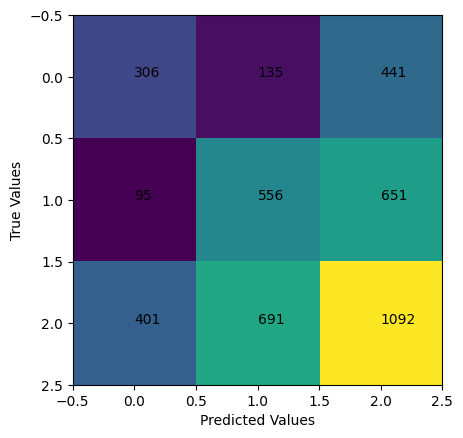

In [12]:
# Construct a confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
# Visualize the confusion matrix
plt.imshow(cm)
# Annotate the heatmap with the data values
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
# Set the labels of the x and y axis
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [22]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.763092,0.693878,0.726841,441.000000
female,0.804631,0.854071,0.828614,651.000000
accuracy,0.789377,0.789377,0.789377,0.789377
macro avg,0.783862,0.773974,0.777727,1092.000000
weighted avg,0.787856,0.789377,0.787513,1092.000000


## Cohen's Kappa Score:

A statistic that measures inter-rater agreement for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation since κ takes into account the possibility of the agreement occurring by chance.

In [18]:
# Calculate the Cohen's Kappa score
metrics.cohen_kappa_score(y_test,y_pred)

0.5560834384975132

# What does a Cohen's Kappa score of 0.55 mean?  
When the Kappa score is over 0.80, it implies that there's an 'almost perfect' match between my model's predictions and the actual values. However, a score of 0.55 indicates that the predictions of my model moderately align with the actual values. This takes into consideration the level of agreement that might simply happen by chance.

## ROC Curve
ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve): These are typically used in binary classification to study the model's output quality.

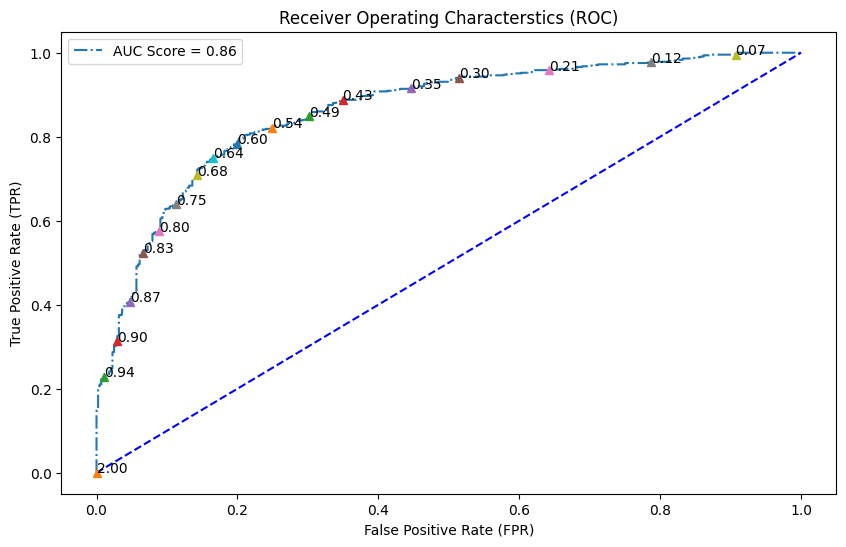

In [23]:
# Construct and visualize the ROC curve
# Let's calculate the False Positive Rate and True Positive Rate for different thresholds.
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])

# Now, we calculate the Area Under Curve (AUC), which tells us, "how much" of the plot is under the curve
auc_s = metrics.auc(fpr,tpr)

# Create a new figure for plotting
plt.figure(figsize=(10,6))

# Plot the ROC curve (TPR vs FPR). 
# A dotted line style is used for this curve.
plt.plot(fpr,tpr,'-.')
# Add a diagonal line, which corresponds to a classifier that predicts classes randomly.
# It serves as a baseline against which the model is evaluated.
plt.plot([0,1],[0,1],'b--')

# Now, for each threshold (we'll skip every 20 to avoid overcrowding), we plot and label it on the ROC curve.
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])  # Here's where we label the threshold

# Let's add a legend showing the AUC score. This score shows the classifier's performance.
plt.legend(['AUC Score = %0.2f'%auc_s])

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate (FPR)')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate (TPR)')
# Add a title to the plot
plt.title('Receiver Operating Characterstics (ROC)')

# Display the plot with all its elements
plt.show()

# What does an AUC score of 0.86 mean?  

In the case of an AUC score of 0.86, this indicates that my model's performance is quite good. Specifically, it means there's an 86% chance that the model will be able to distinguish between a positive class and a negative class. This is a solid performance. 

Would we want a higher score? There is an argument to be made that we don't want a perfect score.

In machine learning, the concept of a "perfect" score is often more theoretical than practical for several reasons:

- Overfitting: A model that achieves a perfect score on its training data may simply be overfitting the data. Overfitting is when the model learns not only the general patterns, but also the noise and outliers in the training data. As a result, it performs poorly on new, unseen data.

- Noise and Uncertainty: Real-world data often has a lot of noise and uncertainties. This noise could be due to measurement errors, random fluctuations, or factors not covered by your data. A perfect model would imply that the model has managed to account for all this noise, which is often not possible or desirable as the noise doesn't represent underlying patterns.

- Model Complexity: A model that perfectly fits the data is likely to be very complex. Such a model may have so many parameters that it becomes computationally intensive and difficult to interpret.

- Generalization: The ultimate goal of a machine learning model is to generalize well from the training data to unseen data. A perfect score on training data or even on a test set does not guarantee that the model will perform as well on new, unseen data.

So, while a perfect score might be an ideal to aim for, it's often more practical and beneficial to aim for a model that generalizes well, avoids overfitting, handles noise appropriately, and balances accuracy with simplicity.

# Hyper Parameter Tuning

In [39]:
# Import necessary packages and models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [57]:
# Define the parameter grid to search over for each model
param_grid_lr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']}
param_grid_svr = {'C':[1,10,20,30,50,100], 'kernel':['rbf','poly'], 'gamma':[0.1,0.05,0.01,0.001,0.002,0.005]}
param_grid_dt = {'criterion' : ['mse', 'friedman_mse', 'mae'], 'splitter' : ['best', 'random']}
param_grid_xgb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}
param_grid_gb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}

In [59]:
# Create a list of classifiers to be tested with the dataset
regressors = [['RandomForest:',RandomForestRegressor(), {'max_features': ['auto'], 'n_estimators': [200]}],
              ['LinearRegression:',LinearRegression(), {'copy_X': [True, False], 'fit_intercept': [True, False]}],
              ['SupportVectorMachine:',SVR(), {'kernel': ['linear', 'poly', 'rbf'], 'C': [1, 10, 100]}],
              ['DecisionTree:', DecisionTreeRegressor(), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}],
              ['XGBoostRegressor:',XGBRegressor(), {'learning_rate': [0.1, 0.2], 'n_estimators': [100, 200]}],
              ['GradientBoostingRegressor:',GradientBoostingRegressor(), {'n_estimators': [100, 200], 'max_depth': [3, 5]}]
              ]


In [60]:
# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test

In [61]:
# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

In [62]:
metrics_df = pd.DataFrame()

In [65]:
# Loop through all classifiers, train, test, and validate the classifier
for name, regressor, params in regressors:
    model_grid = GridSearchCV(regressor, param_grid=params, cv=5, verbose=2, n_jobs=-1)
    model_grid.fit(x_train, y_train)
    
    print("Best Parameters for {}: ".format(name), model_grid.best_params_)
    regressor = model_grid.best_estimator_
    
    predictions = regressor.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    accuracyMAE = mean_absolute_error(y_test, predictions)
    accuracyRMSE = mean_squared_error(y_test, predictions, squared=False)
    R2 = r2_score(y_test, predictions)
    cv_score = cross_val_score(regressor, x_test, y_test, cv=10, scoring='max_error')
    scores_df = pd.DataFrame([[name.strip(" :"), accuracyRMSE,accuracyMAE,R2,abs(cv_score.mean())]])
    metrics_df = pd.concat([metrics_df, scores_df])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for RandomForest::  {'max_features': 'auto', 'n_estimators': 200}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for LinearRegression::  {'copy_X': True, 'fit_intercept': True}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for SupportVectorMachine::  {'C': 1, 'kernel': 'rbf'}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for DecisionTree::  {'max_depth': 10, 'min_samples_split': 5}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for XGBoostRegressor::  {'learning_rate': 0.1, 'n_estimators': 200}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for GradientBoostingRegressor::  {'max_depth': 5, 'n_estimators': 200}


In [56]:
# Clean up the metrics dataframe and display
# Logistic regressions is the best model using stratification with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'AccuracyRMSE','AccuracyMAE','R2','CV_Max_Error']
#metrics_df.to_csv('Regressor_Scores.csv', index=False)
metrics_df

,Classifier,AccuracyRMSE,AccuracyMAE,R2,CV_Max_Error
0,RandomForest,0.386626,0.333445,0.379120,0.878000
0,LinearRegression,0.426142,0.371691,0.245716,1.022507
0,SupportVectorMachine,0.366507,0.291085,0.442057,0.951279
0,DecisionTree,0.501846,0.333526,-0.046082,1.000000
0,XGBoostRegressor,0.370686,0.291919,0.429260,0.998214
0,GradientBoostingRegressor,0.373753,0.301433,0.419778,0.986543


The accuracy of a model tells us the proportion of correct predictions it makes out of all predictions. The closer to 1 (or 100%), the better the model's performance. Based on this metric, the Decision Tree model seems to be the best with an accuracy of 0.501846.

However, accuracy is not the only metric to consider, particularly in cases where the dataset is imbalanced. Let's look at the other metrics:

Root Mean Squared Error (RMSE): This metric tells us how much our predictions deviate, on average, from the actual values in the dataset. The lower the RMSE, the better. The Support Vector Machine model has the lowest RMSE (0.291085).

Mean Absolute Error (MAE): Like RMSE, MAE measures the difference between the predictions and the actual values. However, unlike RMSE, MAE doesn't punish large errors as severely. The lower the MAE, the better. Here again, the Support Vector Machine model has the lowest MAE (0.291085).

R2, also known as the coefficient of determination, measures how well the variations in the predicted values can be explained by the model. The closer the R2 score is to 1, the better the model is performing. The Support Vector Machine model has the highest R2 (0.442057).

CV_Max_Error (presumably a measure of the maximum error in cross-validation): The lower this value, the better. The Random Forest model has the lowest CV_Max_Error (0.878000).

In conclusion, the 'best' model depends on the specific requirements and the context of the problem. If we only look at accuracy, the Decision Tree model is the best. But if we consider RMSE, MAE, and R2, the Support Vector Machine seems to be the best. 

In [91]:
# Construct a new SVC model with the best hyperparameters
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [92]:
# Fit the new model to the training data
model_best.fit(x_train,y_train)

SVC(C=30, gamma=0.002, probability=True)

In [93]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.7921245421245421

In [94]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

# Checking Metrics

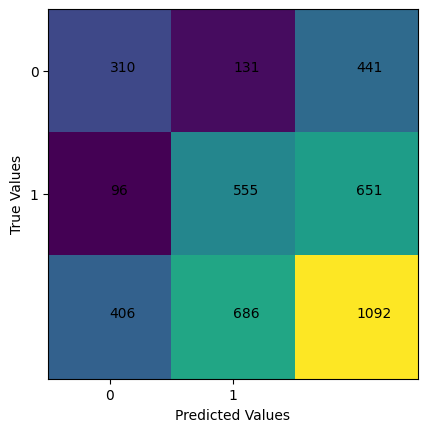

In [95]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [96]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.763547,0.702948,0.731995,441.000000
female,0.809038,0.852535,0.830217,651.000000
accuracy,0.792125,0.792125,0.792125,0.792125
macro avg,0.786292,0.777741,0.781106,1092.000000
weighted avg,0.790666,0.792125,0.790550,1092.000000


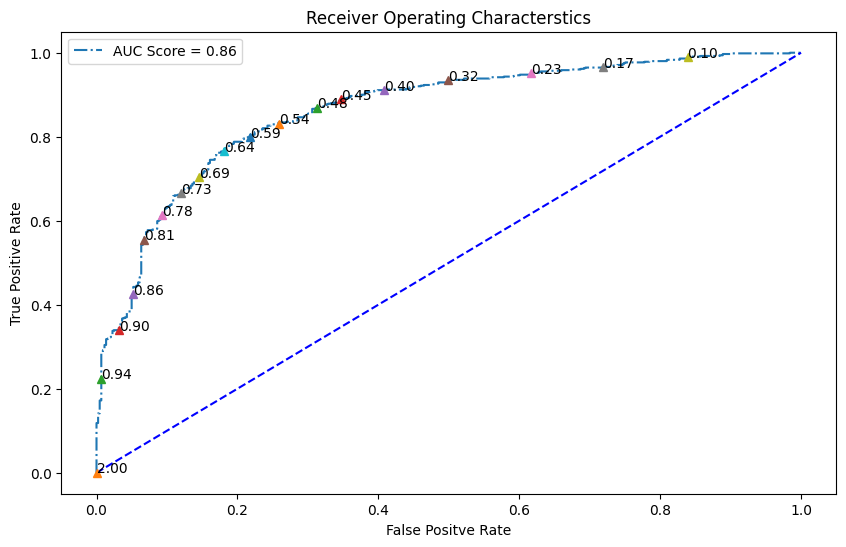

In [97]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [98]:
# save our machine learning model
import pickle

In [99]:
pickle.dump(model_best,open(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\model\model_svm.pickle','wb'))

In [100]:
pickle.dump(mean,open(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\model\mean_preprocess.pickle','wb'))